In [47]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from itertools import combinations
import scipy.stats as stats

## Project Description

For this project, I will be exploring three of my personal playlists on spotify for my three favorite genres of music. In addition, I have created two playlists of music which I like and music which I don't in order to perform a logisitic regression and predict whether or not I will like a song. These playlists will be explored utilizing Spotify's API and the spotipy program in python. For this analysis, I will be attempting to answer 2 main questions:
```
1) Can I predict the popularity for a song in a given genre based on the audio features of the song?
```
```
2) Can I predict my personal rank for a song in a given genre based on the audio features of the song?
```

## Data Selection

For this case study, the three genres of music that I will be exploring are alternative, hard rock, and metalcore. For each of these genres, I have created a spotify playlist ranging from 400 to 650 songs. Using Spotify API, I am able to pull audio features for each of the songs in the particular playlist. These features are quantitative descriptions of a particular song. Features include accousticness, energy, danceability, instrumentalness, etc. There are a total of 14 different audio features for each song which will be used as features in a linear regression model. The target variable for linear regression will be a variable called popularity, which is a quantitative representation of how popular a particular song is.

In addition, I have created a playlist for my favorite genre hard rock which has songs from the genre that I do not like. This data combined with the hard rock playlist that I do like will be used to create a classification problem that can be solved with a logistic regression model. Songs I do like (1) and songs I do not like (0) will be fit with a logistic regression model to determine whether or not I will like a hard rock song based on its audio features.

## Data Acquistion ##

By using Spotify API and the python library called Spotipy, I am able to extract the songs from each playlist. From this, I can use spotipy's get_audio_features for each song and store these features for each song into a pandas dataframe. Similarly, these tracks all have a metric called popularity which can be extracted and placed into the same dataframe and used as the target for linear regression. 

## Data Cleansing

In [1]:
run Spotify_audio_features.py

Runs a python script to obtain the dataframes for the alternative, hard rock, and metalcore playlists with the desired audio features. Note: try to improve speed of script when I get the chance. Luckily in this data, there are no NaN values since the audio features are described in full for each particular song in the playlists.

## EDA

In [6]:
alternative.head()

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,Popularity
0,The 1975,Chocolate,3.744000,0.004100,0.591,0.944,0.000000,11,0.385,-4.325,1,0.0544,100.124,4,https://api.spotify.com/v1/tracks/44Ljlpy44mHv...,0.713,65
1,The 1975,The Sound,4.148000,0.096000,0.643,0.945,0.000008,0,0.495,-4.660,1,0.0779,120.723,4,https://api.spotify.com/v1/tracks/316r1KLN0bcm...,0.526,66
2,3 Doors Down,When I'm Gone,4.341767,0.004570,0.496,0.765,0.000000,7,0.104,-5.660,1,0.0330,74.072,4,https://api.spotify.com/v1/tracks/3WbphvawbMZ8...,0.337,67
3,3 Doors Down,Here Without You,3.976000,0.053700,0.536,0.550,0.000000,10,0.134,-6.733,0,0.0248,144.018,4,https://api.spotify.com/v1/tracks/3NLrRZoMF0Lx...,0.234,69
4,3 Doors Down,Still Alive,2.699100,0.000296,0.426,0.959,0.509000,11,0.201,-4.248,0,0.0560,169.948,4,https://api.spotify.com/v1/tracks/3Q7BHIhobJEH...,0.590,41


In [3]:
hard_rock.head()

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,Popularity
0,10 Years,Wasteland,3.831100,0.000426,0.391,0.801,0.000208,6,0.0662,-5.102,0,0.0813,146.729,4,https://api.spotify.com/v1/tracks/3pO37BXsjMC2...,0.341,63
1,10 Years,Beautiful,3.264883,0.002270,0.497,0.748,0.000000,6,0.1360,-4.500,1,0.0332,131.944,4,https://api.spotify.com/v1/tracks/6AgtIN7FyBd4...,0.274,50
2,10 Years,Shoot It Out,3.328000,0.004420,0.470,0.889,0.000002,6,0.3790,-3.879,1,0.0747,164.111,4,https://api.spotify.com/v1/tracks/6TghWaPh1WHJ...,0.295,48
3,10 Years,Fix Me,3.597333,0.001480,0.444,0.832,0.000000,1,0.0891,-3.857,0,0.0343,158.007,4,https://api.spotify.com/v1/tracks/60OKW0mZiPFH...,0.246,56
4,12 Stones,Anthem For The Underdog,3.073767,0.000651,0.200,0.863,0.000000,5,0.3390,-3.424,1,0.0626,93.977,3,https://api.spotify.com/v1/tracks/6FFwt1ea9hJ4...,0.468,50


In [4]:
metal_core.head()

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,valence,Popularity
0,Abandon All Ships,Take One Last Breath,3.659767,0.001150,0.313,0.961,0.000000,5,0.120,-4.510,1,0.1930,138.721,4,https://api.spotify.com/v1/tracks/2tpQV2QzHhvi...,0.210,45
1,Adept,Death Dealers,3.384883,0.002050,0.460,0.871,0.144000,5,0.566,-6.261,1,0.1180,91.046,4,https://api.spotify.com/v1/tracks/1oGNZv18BpWp...,0.211,25
2,Adept,From the Depths of Hell,3.942433,0.000034,0.177,0.959,0.000019,8,0.403,-4.964,1,0.0721,87.847,4,https://api.spotify.com/v1/tracks/6AAj9C5weV6Z...,0.308,27
3,Adept,Hope,2.830433,0.000007,0.387,0.947,0.172000,8,0.141,-5.014,1,0.0692,97.544,4,https://api.spotify.com/v1/tracks/6jpABYYFMdYq...,0.213,26
4,Adept,Shark! Shark! Shark!,4.323317,0.000606,0.389,0.886,0.000526,7,0.338,-2.815,0,0.0816,97.798,4,https://api.spotify.com/v1/tracks/5vqLZXjnxaPL...,0.207,39


The track_href column provides nothing of value, drop the column from the dataframes

In [7]:
alternative.drop(['track_href'], axis=1,inplace = True)
hard_rock.drop(['track_href'], axis=1,inplace = True)
metal_core.drop(['track_href'], axis=1,inplace = True)

Get an idea of the range of the popularity metric and the most popular songs from each playlist

In [16]:
hard_rock.sort_values(by = ['Popularity'])

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity
23,All That Remains,Believe In Nothing,4.393550,0.000585,0.443,0.823,0.004220,8,0.1540,-4.941,1,0.0336,133.808,4,0.3430,0
269,I Prevail,Heart vs. Mind,3.936633,0.000079,0.510,0.945,0.000041,4,0.4110,-6.431,1,0.2900,145.870,4,0.3320,0
216,Five Finger Death Punch,Hard To See,3.509100,0.000005,0.514,0.972,0.000180,11,0.1040,-3.231,1,0.1750,111.968,4,0.1090,0
134,A Day To Remember,Bad Vibrations,3.563617,0.000077,0.549,0.995,0.000000,4,0.1200,-4.141,1,0.1700,128.083,4,0.0602,0
438,Senses Fail,Calling All Cars,3.392433,0.000031,0.373,0.954,0.000007,2,0.1050,-3.254,1,0.0895,168.130,4,0.6170,0
437,Senses Fail,Can't Be Saved,3.132217,0.000007,0.329,0.975,0.000394,2,0.2990,-3.405,1,0.0905,170.033,4,0.4710,0
137,A Day To Remember,Bullfight,4.592500,0.000148,0.356,0.954,0.000000,8,0.0521,-3.543,1,0.1090,160.401,4,0.2490,0
149,A Day To Remember,Naivety,3.323167,0.000124,0.351,0.979,0.000003,0,0.2550,-3.621,1,0.1320,174.734,4,0.3330,0
289,Korn,A.D.I.D.A.S.,2.546667,0.002340,0.336,0.868,0.011200,11,0.2640,-7.136,0,0.1880,112.987,4,0.3000,0
22,All That Remains,Forever In Your Hands,3.609550,0.002120,0.388,0.952,0.000006,2,0.2160,-4.474,1,0.0922,183.990,4,0.4430,0


In [17]:
metal_core.sort_values(by = ['Popularity'])

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity
215,Dayseeker,The Earth Will Turn,4.715383,0.000542,0.249,0.993,0.000000,6,0.1290,-3.730,1,0.3110,125.534,4,0.0604,0
538,While She Sleeps,Our Legacy,4.130667,0.000018,0.462,0.994,0.000000,4,0.3320,-2.904,0,0.1020,136.990,4,0.2370,0
537,While She Sleeps,Method in Madness,3.901767,0.000194,0.460,0.993,0.000001,7,0.3190,-3.656,1,0.1220,155.013,4,0.3160,0
536,While She Sleeps,Four Walls,5.132217,0.000204,0.485,0.984,0.000004,7,0.1700,-3.389,1,0.1070,136.050,4,0.1090,0
327,Ice Nine Kills,The Nature of the Beast,3.634333,0.005920,0.332,0.982,0.000000,10,0.1120,-3.492,1,0.3010,160.044,4,0.2000,0
535,While She Sleeps,Brainwashed,3.479767,0.000041,0.196,0.995,0.000003,8,0.5440,-3.346,1,0.1660,169.993,4,0.1810,0
326,Ice Nine Kills,The Plot Sickens,3.681033,0.000891,0.496,0.994,0.000551,9,0.0711,-2.388,0,0.1630,117.042,4,0.1150,0
328,In Flames,Only For The Weak,4.920433,0.000002,0.458,0.909,0.758000,0,0.2830,-4.414,0,0.0446,105.007,4,0.4900,0
325,Ice Nine Kills,The People in the Attic,3.809450,0.000072,0.405,0.982,0.021700,10,0.3750,-2.669,1,0.1230,144.991,4,0.1300,0
114,blessthefall,40 Days...,4.306650,0.000064,0.448,0.879,0.000772,2,0.1180,-6.361,0,0.0470,94.990,3,0.2180,0


In [18]:
alternative.sort_values(by = ['Popularity'])

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity
207,Weezer,Pork And Beans,3.152483,0.011600,0.597,0.632,0.000008,6,0.1550,-6.615,1,0.0326,119.821,4,0.6850,0
273,All Time Low,"Dear Maria, Count Me In",3.047100,0.007250,0.465,0.896,0.000000,2,0.2060,-3.126,1,0.0795,181.014,4,0.5690,0
377,I Prevail,My Heart I Surrender,3.451117,0.603000,0.499,0.516,0.000005,2,0.1110,-6.896,1,0.0275,133.145,4,0.3380,0
120,The Offspring,Hammerhead,4.640667,0.001630,0.485,0.950,0.008250,11,0.0757,-3.571,1,0.0541,154.427,4,0.5100,0
117,The Offspring,Why Don't You Get a Job?,2.817100,0.056000,0.768,0.772,0.000006,5,0.2530,-4.317,1,0.0411,107.958,4,0.9370,0
115,The Offspring,The Kids Aren't Alright,2.999100,0.006000,0.512,0.945,0.000032,1,0.0581,-4.204,1,0.0347,99.552,4,0.8120,0
114,The Offspring,Self Esteem,4.296000,0.017500,0.458,0.912,0.000000,5,0.3630,-3.666,1,0.0618,104.526,4,0.6110,0
187,Sum 41,We're All To Blame,3.648433,0.001680,0.211,0.898,0.000000,8,0.0943,-4.790,0,0.1180,159.623,4,0.3000,0
112,The Offspring,Can't Repeat,3.442000,0.011000,0.531,0.863,0.000002,0,0.0844,-3.822,1,0.0383,106.279,4,0.6090,0
177,Starset,It Has Begun,5.280200,0.008760,0.254,0.724,0.001200,5,0.1860,-6.513,1,0.0675,127.888,4,0.1230,0


(array([133.,   3.,  10.,   2.,   4.,   5.,   6.,   9.,  25.,  41.,  46.,
         76.,  68.,  50.,  45.,  38.,  12.,  14.,   3.,   3.]),
 array([ 0.  ,  3.45,  6.9 , 10.35, 13.8 , 17.25, 20.7 , 24.15, 27.6 ,
        31.05, 34.5 , 37.95, 41.4 , 44.85, 48.3 , 51.75, 55.2 , 58.65,
        62.1 , 65.55, 69.  ]),
 <a list of 20 Patch objects>)

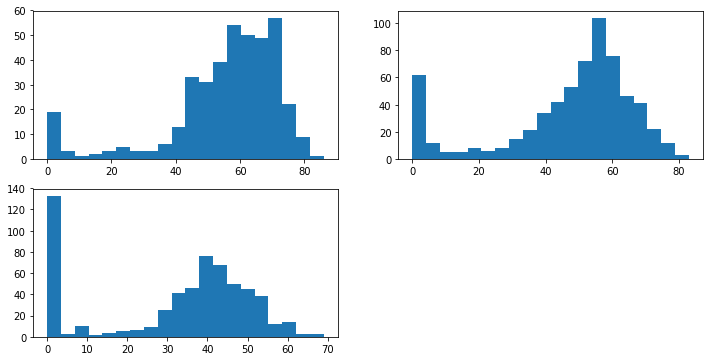

In [22]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(221)

ax.hist(alternative['Popularity'],20)

ax1 = fig.add_subplot(222)
ax1.hist(hard_rock['Popularity'],20)

ax2 = fig.add_subplot(223)
ax2.hist(metal_core['Popularity'],20)

Many songs for the Hard Rock and Metalcore playlists have a popularity of 0, this might cause problems later. From intuition this result is not surprising because in general these genres are much less popular.

In [23]:
alt = alternative['Popularity'].mean()
rock = hard_rock['Popularity'].mean()
metal = metal_core['Popularity'].mean()
print(alt,rock,metal)

55.33002481389578 46.85935085007728 31.81618887015177


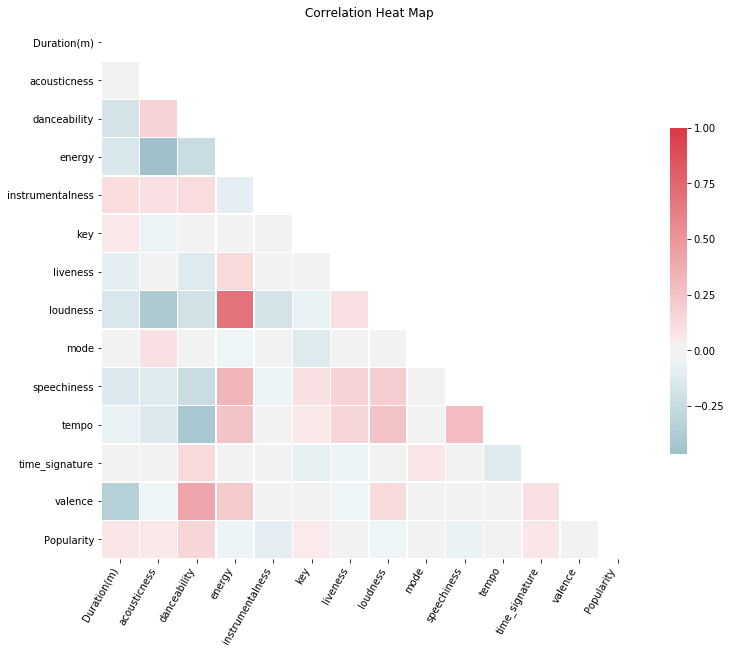

<Figure size 432x288 with 0 Axes>

In [29]:
def corr_heat(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.index, yticklabels=corr.columns)
    plt.xticks(rotation=60, ha="right")
    plt.yticks(rotation=0)
    ax.set_title("Correlation Heat Map")
    plt.show()
    plt.savefig('Corr_map.png',dpi = 400)

corr_heat(alternative)


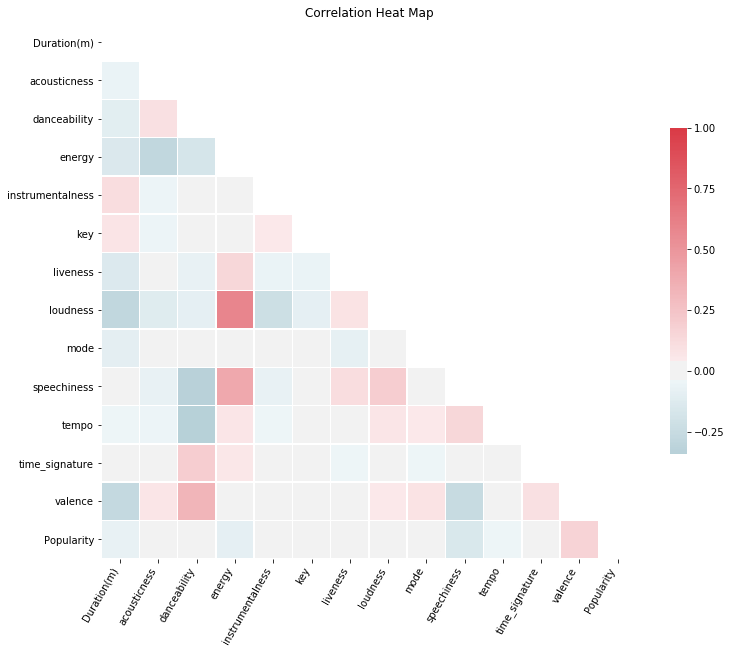

<Figure size 432x288 with 0 Axes>

In [30]:
corr_heat(hard_rock)

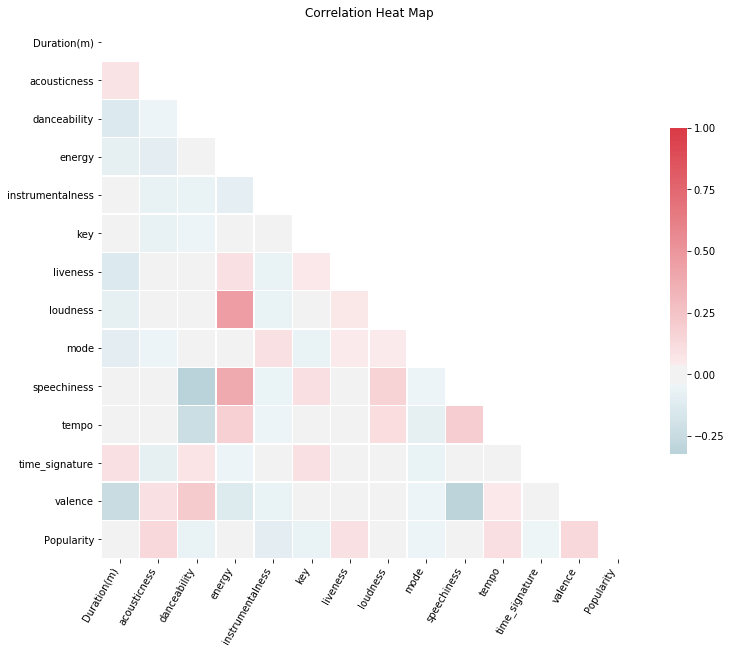

<Figure size 432x288 with 0 Axes>

In [31]:
corr_heat(metal_core)

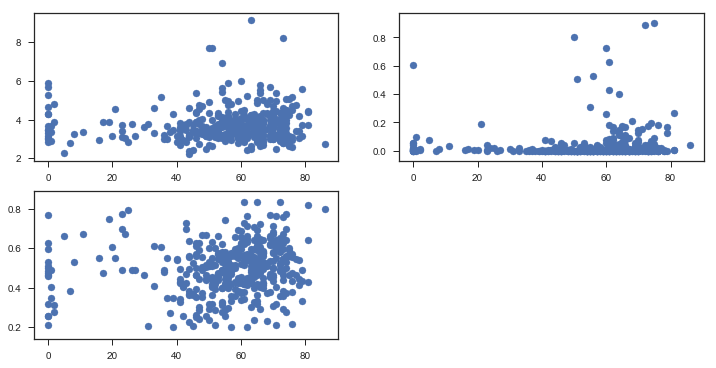

In [43]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(221)

ax.scatter(alternative['Popularity'],alternative['Duration(m)'])

ax2 = fig.add_subplot(222)
ax2.scatter(alternative['Popularity'],alternative['acousticness'])
ax3 = fig.add_subplot(223)
ax3.scatter(alternative['Popularity'],alternative['danceability'])

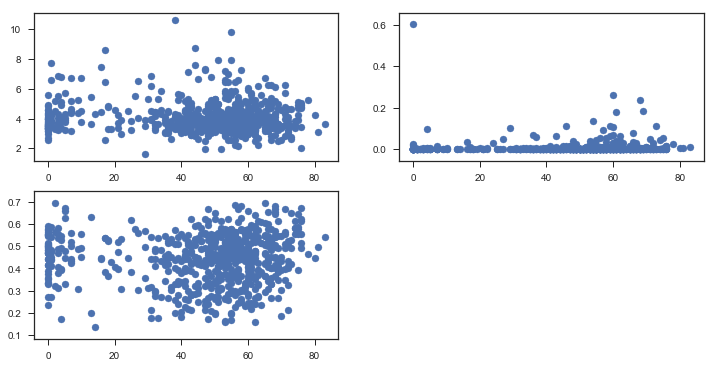

In [44]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(221)

ax.scatter(hard_rock['Popularity'],hard_rock['Duration(m)'])

ax2 = fig.add_subplot(222)
ax2.scatter(hard_rock['Popularity'],hard_rock['acousticness'])
ax3 = fig.add_subplot(223)
ax3.scatter(hard_rock['Popularity'],hard_rock['danceability'])

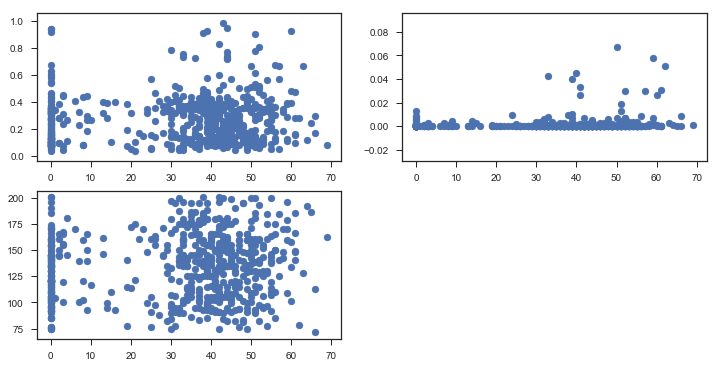

In [45]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(221)

ax.scatter(metal_core['Popularity'],metal_core['liveness'])

ax2 = fig.add_subplot(222)
ax2.scatter(metal_core['Popularity'],metal_core['acousticness'])
ax3 = fig.add_subplot(223)
ax3.scatter(metal_core['Popularity'],metal_core['tempo'])

An interesting hypothesis test would involve seeing if there was a statistically significant difference in the mean popularity from the three genres of music

## Combined Genres

In [56]:
altpop = alternative['Popularity']
rockpop = hard_rock['Popularity']
metalpop = metal_core['Popularity']
alternative['Genre'] = 'Alternative'
hard_rock['Genre'] = 'Hard Rock'
metal_core['Genre'] = 'Metalcore'
combineddf = pd.concat([alternative,hard_rock])
final = pd.concat([combineddf,metal_core])
final

,Artist,Title,Duration(m),acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Popularity,Genre
0,The 1975,Chocolate,3.744000,0.004100,0.591,0.944,0.000000,11,0.3850,-4.325,1,0.0544,100.124,4,0.7130,65,Alternative
1,The 1975,The Sound,4.148000,0.096000,0.643,0.945,0.000008,0,0.4950,-4.660,1,0.0779,120.723,4,0.5260,66,Alternative
2,3 Doors Down,When I'm Gone,4.341767,0.004570,0.496,0.765,0.000000,7,0.1040,-5.660,1,0.0330,74.072,4,0.3370,67,Alternative
3,3 Doors Down,Here Without You,3.976000,0.053700,0.536,0.550,0.000000,10,0.1340,-6.733,0,0.0248,144.018,4,0.2340,69,Alternative
4,3 Doors Down,Still Alive,2.699100,0.000296,0.426,0.959,0.509000,11,0.2010,-4.248,0,0.0560,169.948,4,0.5900,41,Alternative
5,The Almost,Say This Sooner,3.236667,0.006510,0.572,0.967,0.000000,4,0.0760,-3.733,0,0.0967,121.008,4,0.5270,46,Alternative
6,The Almost,Southern Weather,3.481333,0.000029,0.349,0.963,0.000000,2,0.3700,-3.448,1,0.0791,173.876,4,0.4880,39,Alternative
7,Arctic Monkeys,Do I Wanna Know?,4.539900,0.186000,0.548,0.532,0.000263,5,0.2170,-7.596,1,0.0323,85.030,4,0.4050,21,Alternative
8,AWOLNATION,Run,4.027583,0.725000,0.686,0.665,0.687000,1,0.2680,-10.214,1,0.0449,137.920,4,0.6720,60,Alternative
9,Band of Horses,The Funeral,5.352433,0.014200,0.316,0.769,0.000000,0,0.0928,-5.283,0,0.0422,122.507,4,0.1270,71,Alternative


(array([216.,  21.,  11.,  16.,  18.,  18.,  34.,  67.,  90., 143., 162.,
        156., 162., 166., 114., 108.,  90.,  37.,  12.,   2.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ,
        47.3, 51.6, 55.9, 60.2, 64.5, 68.8, 73.1, 77.4, 81.7, 86. ]),
 <a list of 20 Patch objects>)

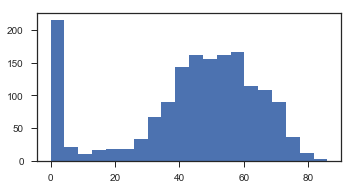

In [53]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(221)

ax.hist(final['Popularity'],20)

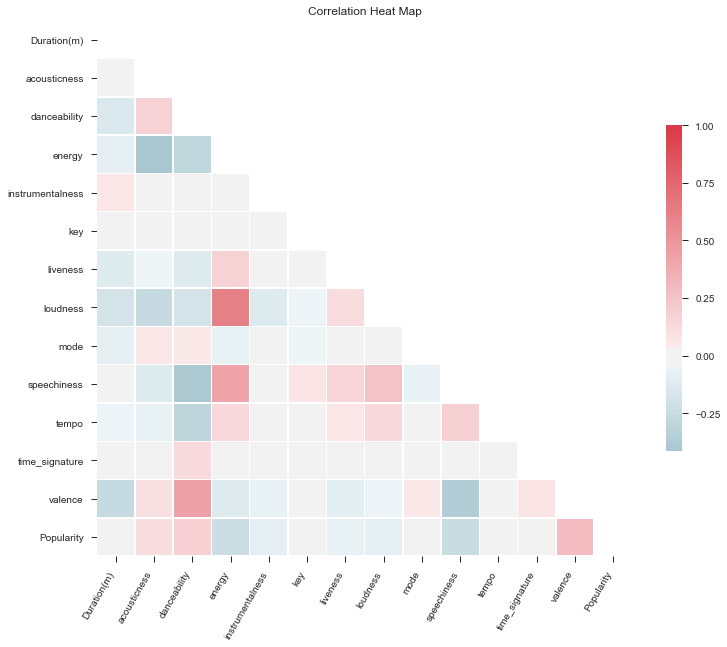

<Figure size 432x288 with 0 Axes>

In [77]:
corr_heat(final)

In [74]:
combos = combinations(pd.unique(final['Genre']), 2)

In [75]:
results = pd.DataFrame()
for age_group_1, age_group_2 in combos:
    age_group_1_ctr = final[final.Genre == age_group_1]['Popularity']
    age_group_2_ctr = final[final.Genre == age_group_2]['Popularity']
    p_value = stats.ttest_ind(age_group_1_ctr, age_group_2_ctr, equal_var=True)[1]
    age_group_1_ctr_mean = age_group_1_ctr.mean()
    age_group_2_ctr_mean = age_group_2_ctr.mean()
    diff = age_group_1_ctr_mean-age_group_2_ctr_mean
    absolute_diff = abs(age_group_1_ctr_mean-age_group_2_ctr_mean)
    results = results.append({
              'first_age_group':age_group_1, 'second_age_group':age_group_2, 
              'first_group_mean':age_group_1_ctr_mean, 'second_group_mean':age_group_2_ctr_mean,
              'mean_diff':diff, 'absolute_mean_diff':absolute_diff, 'p_value':p_value},
              ignore_index=True)

results = results[['first_age_group', 'second_age_group', 
                   'first_group_mean', 'second_group_mean', 
                   'mean_diff', 'absolute_mean_diff', 'p_value']]


In [76]:
results

,first_age_group,second_age_group,first_group_mean,second_group_mean,mean_diff,absolute_mean_diff,p_value
0,Alternative,Hard Rock,55.330025,46.859351,8.470674,8.470674,1.405010e-11
1,Alternative,Metalcore,55.330025,31.816189,23.513836,23.513836,2.413803e-70
2,Hard Rock,Metalcore,46.859351,31.816189,15.043162,15.043162,2.502535e-37


This table shows that there is a statistically significant difference in mean popularity between the three genres of music.